In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn.linear_model import LogisticRegression

from sklearn import tree
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image

import plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import iplot

import numpy as np
import pandas as pd
import scipy
from scipy import stats

In [2]:
#!pip install plotly==5.1.0
#!pip uninstall plotly==5.1.0

In [3]:
#!pip install plotly==3.10.0
#!pip install cufflinks

In [4]:
x = np.linspace(-4, 4, 160)
y1 = scipy.stats.norm.pdf(x)
y2 = scipy.stats.norm.pdf(x, loc=2)

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

data = [trace1, trace2]

py.iplot(data, filename='normal-dists-plot')

AttributeError: module 'plotly' has no attribute 'iplot'

In [5]:
df = pd.read_csv('Clothing_Store.csv')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('&', 'and')
df.columns = df.columns.str.replace('-', '_')
df.drop([6268], inplace = True)

In [19]:
df["credit_card_bin"].describe()
df["WEB"].sum()
x=0
for i in df["MAILED"]:
    if i > 0:
        x=x+1
print(x)

6763


In [6]:
purchases=df["Num_Purchases"]
total_spend=df["TotalSpend"]
print(type(purchases))
print(df[0:0])

<class 'pandas.core.series.Series'>
Empty DataFrame
Columns: [HHKEY, ZIP_CODE, Num_Purchases, TotalSpend, Credit_Card_User, Average_Spend, PC_CALC20, PSWEATERS, PKNIT_TOPS, PKNIT_DRES, PBLOUSES, PJACKETS, PCAR_PNTS, PCAS_PNTS, PSHIRTS, PDRESSES, PSUITS, POUTERWEAR, PJEWELRY, PFASHION, PLEGWEAR, Pother, PROMOS, DaysonFile, BeteenPurchases, MARKDOWN, COUPONS, STORES, WEB, MAILED, RESPONDED, RESPONSERATE, DiversitySpend, Perc_Returns, RESP]
Index: []

[0 rows x 35 columns]


In [7]:
#שינוי עמודת הכרטיס אשראי לבינארית
df["credit_card_bin"]=np.where(df["Credit_Card_User"]=="Yes",1,0)

In [35]:
#הטבלה עם העמודות שמעניינות אותנו באמת
#df=df.drop(columns="HHKEY","ZIP_CODE","Credit_Card_User","Average_Spend","PC_CALC20"]
df_reg=df[["TotalSpend","PROMOS","COUPONS","WEB","MAILED","RESPONDED","Perc_Returns","credit_card_bin","DiversitySpend"]]
pd.set_option('display.max_columns', 35) #replace n with the number of columns you want to see completely
df_corr=df_reg.corr()
print(df_corr)
df_reg=df_reg.drop(columns="RESPONDED")

                 TotalSpend    PROMOS   COUPONS       WEB    MAILED  \
TotalSpend         1.000000  0.449112  0.732746  0.213813  0.396139   
PROMOS             0.449112  1.000000  0.406527  0.146671  0.892671   
COUPONS            0.732746  0.406527  1.000000  0.185210  0.351516   
WEB                0.213813  0.146671  0.185210  1.000000  0.112079   
MAILED             0.396139  0.892671  0.351516  0.112079  1.000000   
RESPONDED          0.696184  0.652418  0.694055  0.192196  0.663458   
Perc_Returns       0.022416  0.099425  0.097552  0.049442  0.088268   
credit_card_bin    0.367435  0.417327  0.442141  0.135192  0.362191   
DiversitySpend    -0.371587 -0.325218 -0.308349 -0.124719 -0.300749   

                 RESPONDED  Perc_Returns  credit_card_bin  DiversitySpend  
TotalSpend        0.696184      0.022416         0.367435       -0.371587  
PROMOS            0.652418      0.099425         0.417327       -0.325218  
COUPONS           0.694055      0.097552         0.442141    

In [36]:
#הרגרסיה
X=df_reg.drop(columns="TotalSpend")
y=df_reg["TotalSpend"]
training_set_fraction = 0.7
msk = np.random.rand(len(y)) < training_set_fraction
X_train = X[msk]
y_train = y[msk]
X_test = X[~msk]
y_test = y[~msk]
print ('Training set size: {0:d}\nTest set size: {1:d}'.format(len(X_train),len(X_test)))
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Regression finished with R^2=',lm.score(X_test,y_test))
y_hat=lm.predict(X_test)
mae=mean_absolute_error(y_hat,y_test)
mse=mean_squared_error(y_hat,y_test)
rmae=mae**(0.5)
rmse=mse**(0.5)
print("root of mse=",rmse)
importance=lm.coef_
the_brand_is_right = pd.Series(importance, index=X.columns)
sorted_importances=the_brand_is_right.sort_values()
print(sorted_importances)

Training set size: 5585
Test set size: 2552
Regression finished with R^2= 0.5590242774540478
root of mse= 398.4476241772208
Perc_Returns      -183.545812
credit_card_bin    -43.049755
DiversitySpend      -3.440380
MAILED              -1.389549
PROMOS              15.380621
WEB                247.016443
COUPONS            249.761540
dtype: float64


In [20]:
#יצירת שתי טבלאות חדשות למתחת לחציון ומעל החציון
median_total_spend=df["TotalSpend"].median()
print(median_total_spend)
df["bigger_than_median"]=np.where(df["TotalSpend"]>=median_total_spend,1,0)
df_less_median=df.loc[df.bigger_than_median==0]
df_bigger_median=df.loc[df.bigger_than_median==1]

265.98


In [29]:
#t test
stats.ttest_ind(df_less_median["COUPONS"],df_bigger_median["COUPONS"],equal_var=False)
high_pvalue=[]
low_pvalue=[]
mean_bigger=[]
mean_less=[]
subject=[]
p_value=[]
for r in ["PROMOS","WEB","COUPONS","MAILED","RESPONDED","DiversitySpend","Perc_Returns"]:
    result=stats.ttest_ind(df_less_median[r],df_bigger_median[r],equal_var=False)
    if (result.pvalue < 0.05):
        high_pvalue.append(r)
        p_value.append("yes")
    else:
        low_pvalue.append(r)
        p_value.append("no")
    mean_bigger.append(df_bigger_median[r].mean())
    mean_less.append(df_less_median[r].mean())
    subject.append(r)
for r in ["PSWEATERS", "PKNIT_TOPS", "PKNIT_DRES", "PBLOUSES", "PJACKETS", "PCAR_PNTS", "PCAS_PNTS", "PSHIRTS", "PDRESSES", "PSUITS", "POUTERWEAR", "PJEWELRY", "PFASHION", "PLEGWEAR"]:
    result=stats.ttest_ind(df_less_median[r],df_bigger_median[r],equal_var=False)
    if (result.pvalue < 0.05):
        high_pvalue.append(r)
        p_value.append("yes")
    else:
        low_pvalue.append(r)
        p_value.append("no")
    mean_bigger.append(df_bigger_median[r].mean())
    mean_less.append(df_less_median[r].mean())
    subject.append(r)
print("high p value are: ",high_pvalue)
print("low p value are: ",low_pvalue)
d_means={"subject": subject, "mean_bigger": mean_bigger, "mean_less": mean_less, "significance": p_value}
df_means=pd.DataFrame(data=d_means)
df_means

    

high p value are:  ['PROMOS', 'WEB', 'COUPONS', 'MAILED', 'RESPONDED', 'DiversitySpend', 'Perc_Returns', 'PSWEATERS', 'PKNIT_TOPS', 'PBLOUSES', 'PJACKETS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'PJEWELRY', 'PFASHION', 'PLEGWEAR']
low p value are:  ['PKNIT_DRES', 'PCAR_PNTS', 'POUTERWEAR']


,subject,mean_bigger,mean_less,significance
0,PROMOS,14.838781,8.245575,yes
1,WEB,0.072499,0.012537,yes
2,COUPONS,1.450479,0.099066,yes
3,MAILED,6.112558,3.035644,yes
4,RESPONDED,2.126075,0.272124,yes
5,DiversitySpend,23.874040,51.541138,yes
6,Perc_Returns,0.128474,0.110320,yes
7,PSWEATERS,0.188372,0.243884,yes
8,PKNIT_TOPS,0.025071,0.031315,yes
9,PKNIT_DRES,0.039030,0.042448,no


In [58]:
#רגרסיה ליניארית על מתחת לחציון
df_reg=df_less_median[["TotalSpend","credit_card_bin", "PROMOS", "WEB", "COUPONS", "MAILED","Perc_Returns"]]


Training set size: 2873
Test set size: 1195
Regression finished with R^2= 0.08413212492748667
root of mse= 55.77071276101825


,TotalSpend,credit_card_bin,PROMOS,WEB,COUPONS,MAILED,Perc_Returns
count,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000
mean,144.400703,0.172566,8.245575,0.012537,0.099066,3.035644,0.110320
std,58.812756,0.377918,5.872418,0.111278,0.323293,3.045101,0.466719
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.970000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,135.980000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000
75%,189.992500,0.000000,13.000000,0.000000,0.000000,5.000000,0.000000
max,265.930000,1.000000,28.000000,1.000000,3.000000,11.000000,10.520000


In [37]:
#רגרסיה ליניארית על הכל
df_reg=df[["TotalSpend","credit_card_bin", "PROMOS", "WEB", "COUPONS", "MAILED","Perc_Returns"]]
X=df_reg.drop(columns="TotalSpend")
y=df_reg["TotalSpend"]
training_set_fraction = 0.7
msk = np.random.rand(len(y)) < training_set_fraction
X_train = X[msk]
y_train = y[msk]
X_test = X[~msk]
y_test = y[~msk]
print ('Training set size: {0:d}\nTest set size: {1:d}'.format(len(X_train),len(X_test)))
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Regression finished with R^2=',lm.score(X_test,y_test))
y_hat=lm.predict(X_test)
mae=mean_absolute_error(y_hat,y_test)
mse=mean_squared_error(y_hat,y_test)
rmae=mae**(0.5)
rmse=mse**(0.5)
print("root of mse=",rmse)
lm.coef_

Training set size: 5659
Test set size: 2478
Regression finished with R^2= 0.579646661388697
root of mse= 427.9000909604108


array([  -0.81219905,   15.13066667,  219.39192707,  240.16796685,
          4.22245081, -102.13992292])

In [ ]:
dummyDF=pd.get_dummies(df)
X=dummyDF.drop(columns="selling_price")
y=df["selling_price"]
training_set_fraction = 0.7
msk = np.random.rand(len(y)) < training_set_fraction
X_train = X[msk]
y_train = y[msk]
X_test = X[~msk]
y_test = y[~msk]
print ('Training set size: {0:d}\nTest set size: {1:d}'.format(len(X_train),len(X_test)))
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Regression finished with R^2=',lm.score(X_test,y_test))
#הדפסת מדדים נוספים
y_hat=lm.predict(X_test)
mae=mean_absolute_error(y_hat,y_test)
mse=mean_squared_error(y_hat,y_test)
rmae=mae**(0.5)
rmse=mse**(0.5)
print("root of mse=",rmse)

In [8]:
pd.set_option('display.max_columns', 35) #replace n with the number of columns you want to see completely
df_describe=df.describe()
print(df_describe)


              HHKEY      ZIP_CODE  Num_Purchases    TotalSpend  Average_Spend  \
count  8.137000e+03   8137.000000    8137.000000   8137.000000    8137.000000   
mean   9.960000e+12  23783.398919       5.174757    491.480172     114.072791   
std    0.000000e+00  11219.560409       6.614931    663.126944      86.390698   
min    9.960000e+12   1001.000000       1.000000      5.000000       2.500000   
25%    9.960000e+12  15116.000000       1.000000    135.980000      60.640000   
50%    9.960000e+12  27233.000000       3.000000    265.980000      92.490000   
75%    9.960000e+12  33024.000000       6.000000    581.230000     139.970000   
max    9.960000e+12  98433.000000     115.000000  12794.020000    1331.940000   

         PC_CALC20    PSWEATERS   PKNIT_TOPS   PKNIT_DRES     PBLOUSES  \
count  8137.000000  8137.000000  8137.000000  8137.000000  8137.000000   
mean     12.728893     0.216124     0.028192     0.040739     0.096303   
std       2.533743     0.232349     0.067772    

In [29]:
#sort of the means and the medians from the describe
means=df_describe.iloc[1,6:20]
means.sort_values(ascending=False)
medians=df_describe.iloc[5,6:20]
medians.sort_values(ascending=False)

PSWEATERS     0.16
PBLOUSES      0.05
PJACKETS      0.04
PLEGWEAR      0.00
PFASHION      0.00
PJEWELRY      0.00
POUTERWEAR    0.00
PSUITS        0.00
PDRESSES      0.00
PSHIRTS       0.00
PCAS_PNTS     0.00
PCAR_PNTS     0.00
PKNIT_DRES    0.00
PKNIT_TOPS    0.00
Name: 50%, dtype: float64

In [ ]:
if

percent of clients that buy in more than 5000 dollars:  0.2212117488017697
percent of clients that buy in more than 1000 dollars:  12.203514808897628
percent of clients that buy in less than 100 dollars:  14.513948629716111


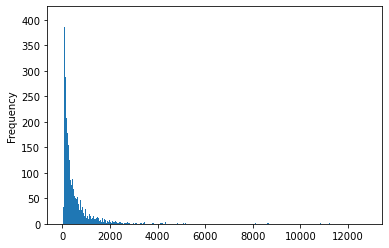

In [63]:
total_spend.plot.hist(by=None, bins=1000)
bigger_than_5000=0
bigger_than_1000=0
lower_than_100=0
for r in total_spend:
    if r > 5000:
        bigger_than_5000+=1
    if r > 1000:
        bigger_than_1000+=1
    if r < 100:
        lower_than_100+=1
        
bigger_than_5000=bigger_than_5000*100/len(total_spend)
bigger_than_1000=bigger_than_1000*100/len(total_spend)
lower_than_100=lower_than_100*100/len(total_spend)

print("percent of clients that buy in more than 5000 dollars: ",bigger_than_5000)
print("percent of clients that buy in more than 1000 dollars: ",bigger_than_1000)
print("percent of clients that buy in less than 100 dollars: ",lower_than_100)
print 

In [19]:
#df = pd.DataFrame({'x':x,'y':y})
#purchases=float(df["Num_Purchases"])
#total_spend=df["TotalSpend"]
#ax=df.plot.scatter(x=purchases,y=total_spend, s=1, label = f"{purchases.corr(total_spend):2.2f}")
#ax.legend(); ax.set_xlabel('purchases'); ax.set_ylabel('total spend');
#return ax

TypeError: cannot convert the series to <class 'float'>

In [7]:
print(df.head())
print(df["ZIP_CODE"])

          HHKEY  ZIP_CODE  Num_Purchases  TotalSpend Credit_Card_User  \
0  9.960000e+12      1001              2      368.46               No   
1  9.960000e+12      1028              4      258.00              Yes   
2  9.960000e+12      1056              2       77.00               No   
3  9.960000e+12      1118              8      846.06              Yes   
4  9.960000e+12      1107              1       87.44               No   

   Average_Spend  PC_CALC20  PSWEATERS  PKNIT_TOPS  PKNIT_DRES  ...  MARKDOWN  \
0         184.23         11       0.18        0.00        0.00  ...      0.08   
1          64.50         11       0.26        0.16        0.00  ...      0.33   
2          38.50         11       1.00        0.00        0.00  ...      0.11   
3         105.75         11       0.38        0.00        0.05  ...      0.29   
4          87.44         11       0.20        0.20        0.00  ...      0.42   

   COUPONS  STORES  WEB  MAILED  RESPONDED  RESPONSERATE  DiversitySpend  